In [ ]:
# Down the kaggle dataset
# !curl -L -o gtsrb-german-traffic-sign.zip https://www.kaggle.com/api/v1/datasets/download/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
# !unzip gtsrb-german-traffic-sign.zip -d gtsrb
# !rm gtsrb-german-traffic-sign.zip

In [ ]:

input_dir = "gtsrb"


In [6]:
import pandas as pd 

nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv(input_dir + '/Meta.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Meta.csv'
nRow, nCol = df1.shape
df1.head()




,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [7]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

2025-10-30 11:53:32.698007: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = input_dir + "/train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

gtsrb/train/0/
gtsrb/train/1/
gtsrb/train/2/
gtsrb/train/3/
gtsrb/train/4/
gtsrb/train/5/
gtsrb/train/6/
gtsrb/train/7/
gtsrb/train/8/
gtsrb/train/9/
gtsrb/train/10/
gtsrb/train/11/
gtsrb/train/12/
gtsrb/train/13/
gtsrb/train/14/
gtsrb/train/15/
gtsrb/train/16/
gtsrb/train/17/
gtsrb/train/18/
gtsrb/train/19/
gtsrb/train/20/
gtsrb/train/21/
gtsrb/train/22/
gtsrb/train/23/
gtsrb/train/24/
gtsrb/train/25/
gtsrb/train/26/
gtsrb/train/27/
gtsrb/train/28/
gtsrb/train/29/
gtsrb/train/30/
gtsrb/train/31/
gtsrb/train/32/
gtsrb/train/33/
gtsrb/train/34/
gtsrb/train/35/
gtsrb/train/36/
gtsrb/train/37/
gtsrb/train/38/
gtsrb/train/39/
gtsrb/train/40/
gtsrb/train/41/
gtsrb/train/42/


In [9]:


#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)



In [10]:


#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)



/home/sp/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-30 11:59:14.188194: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-10-30 11:59:14.190465: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-10-30 11:59:14.190496: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: p200300d297192600016b623367354e87.dip0.t-ipconnect.de
20

In [ ]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_val, y_val))





Epoch 1/20


2025-10-30 11:59:47.844792: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 338774400 exceeds 10% of free system memory.


980/981 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4116 - loss: 2.1870

2025-10-30 12:00:38.950426: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 84682800 exceeds 10% of free system memory.


981/981 ━━━━━━━━━━━━━━━━━━━━ 54s 52ms/step - accuracy: 0.6541 - loss: 1.2247 - val_accuracy: 0.9597 - val_loss: 0.1555
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.9278 - loss: 0.2358 - val_accuracy: 0.9888 - val_loss: 0.0561
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.9577 - loss: 0.1380 - val_accuracy: 0.9912 - val_loss: 0.0321
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.9676 - loss: 0.1072 - val_accuracy: 0.9935 - val_loss: 0.0270
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.9742 - loss: 0.0853 - val_accuracy: 0.9938 - val_loss: 0.0236
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.9772 - loss: 0.0755 - val_accuracy: 0.9943 - val_loss: 0.0227
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.9799 - loss: 0.0632 - val_accuracy: 0.9955 - val_loss: 0.0179
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.9814 - loss: 0.0594 - val_accurac

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

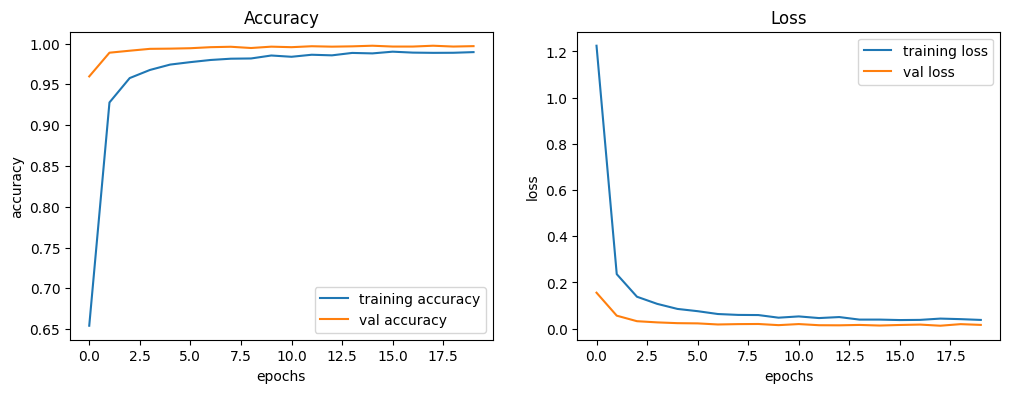

In [18]:

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122            )
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [21]:
#Predicting with the test data
y_test=pd.read_csv(input_dir + "/Test.csv")
y_test.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
labels=y_test['Path'].
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread(  input_dir + '/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [24]:

pred = model.predict(X_test)

2025-10-30 12:30:52.744866: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 136404000 exceeds 10% of free system memory.


395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


In [31]:
predicted_classes = np.argmax(pred, axis=1)

In [32]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_classes)

0.9734758511480601